In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [3]:
lines = pd.read_csv('./USA_Housing.csv')

In [4]:
lines.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [12]:
rate = .8
sqlit = int(len(lines) * rate)
lines = np.random.permutation(lines)
train,test = lines[:sqlit],lines[sqlit:]
scaler = StandardScaler()
scaler.fit(train)
scaler.transform(train)
scaler.transform(test)
x_train,y_train = train[:,:-1],train[:,-1]
x_test,y_test = test[:,:-1],test[:,-1]

In [13]:
x_train.shape,y_train.shape

((4000, 5), (4000,))

In [14]:
x_test.shape,y_test.shape

((1000, 5), (1000,))

In [15]:
def batch_generator(x,y,batch_size,shuffle=True):
    batch_count = 0
    if shuffle:
        idx = np.random.permutation(len(x))
        x = x[idx]
        y = y[idx]
    while True:
        start = batch_count * batch_size
        end = min(start + batch_size,len(x))
        if start >= end:
            break
        batch_count += 1
        yield x[start:end],y[start:end]

In [21]:
# 假设我们有一些数据和标签
x = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = np.array([0, 1, 0, 1, 0])

gen = batch_generator(x,y,batch_size=5,shuffle=True)
batch_x,batch_y = next(gen)
print(batch_x)
print(batch_y)

[[ 5  6]
 [ 3  4]
 [ 7  8]
 [ 9 10]
 [ 1  2]]
[0 1 1 0 0]


In [23]:
X = np.concatenate([x_train,np.ones((len(x_train),1))],axis=-1)

In [24]:
X.shape

(4000, 6)

In [25]:
X_test = np.concatenate([x_test,np.ones((len(x_test),1))],axis=-1)

In [27]:
X_test.shape

(1000, 6)

In [28]:
X.shape[1]

6

np.random.normal(loc=0.0, scale=1.0, size=None)

- loc(float)：此概率分布的均值（对应着整个分布的中心centre
- scale(float)：此概率分布的标准差（对应于分布的宽度，scale越大，图形越矮胖；scale越小，图形越瘦高）
- size(int or tuple of ints)：输出的shape，默认为None，只输出一个值

In [31]:
# 高斯分布随机函数
theta = np.random.normal(size = X.shape[1])

In [30]:
theta

array([-0.75199561, -0.34630347, -1.95786966,  0.21715562, -0.75078245,
        0.32809959])

In [33]:
train_losses = []
test_losses = []

In [51]:
import pandas as pd
data = pd.read_csv('ex2data2.txt',header=None, names = ('x1','x2','y'))

In [52]:
data.shape

(118, 3)

In [53]:
data.sample(5)

,x1,x2,y
14,0.54666,0.487570,1
104,-0.15035,-0.367690,0
43,0.46025,0.012427,1
42,0.64459,-0.141080,1
24,-0.11578,-0.396930,1


In [54]:
data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

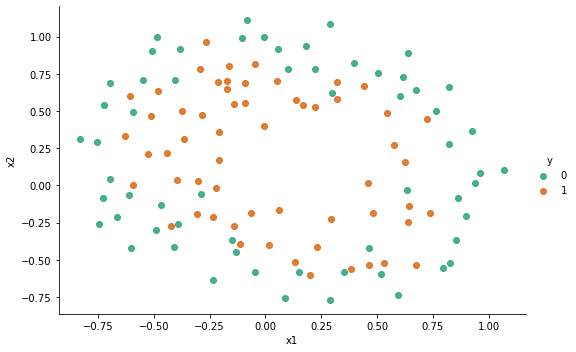

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lmplot(x='x1',y='x2',hue='y',data=data,fit_reg=False,palette='Dark2',aspect=1.5)
plt.show()

In [58]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [59]:
from sklearn.model_selection import train_test_split
X_tr,X_ts,y_tr,y_ts = train_test_split(X,y)
X_tr.shape,X_ts.shape

((88, 2), (30, 2))

In [60]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(18)
X_tr_transform = poly.fit_transform(X_tr)
X_tr_transform.shape

(88, 190)

In [77]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_tr_transform, y_tr)

LogisticRegression(random_state=0)

In [78]:
X_ts_transform = poly.fit_transform(X_ts)
y_pred = model.predict(X_ts_transform)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_ts,y_pred)

array([[ 8,  7],
       [ 1, 14]], dtype=int64)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_ts,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.67      0.93      0.78        15

    accuracy                           0.73        30
   macro avg       0.78      0.73      0.72        30
weighted avg       0.78      0.73      0.72        30



In [81]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_tr_transform, y_tr, cv=10, scoring='accuracy')
scores.mean()

0.7722222222222221

In [82]:
scores = cross_val_score(model, X_tr_transform, y_tr, cv=10, scoring='f1')
scores.mean()

0.7974242424242424

In [83]:
def plot_decision_boundary(theta, X, y,lamda=0):
    import seaborn as sns
    import numpy as np
    sns.lmplot(x='x1',y='x2',hue='y',data=data,fit_reg=False,aspect= 1.5,palette='Dark2')
    z = np.zeros([50, 50])
    uu = np.linspace(-1.0, 1.5, 50)
    vv = np.linspace(-1.0, 1.5, 50)
    for i, u in enumerate(uu):
        for j, v in enumerate(vv):
            tmp = np.array([[u],[v]]).T
            tmp1 = poly.fit_transform(tmp)
            z[i, j] = np.dot(tmp1, model.coef_.T).item()
    plt.contour(uu, vv, z.T, [0], colors='dodgerblue')
    plt.axis([-.8, 1.2, -.8, 1.2])
    plt.xticks(np.arange(-.8, 1.3, .2))
    plt.yticks(np.arange(-.8, 1.3, .2))
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    if lamda==0:
        None
    else:
        plt.title('Decision boundary for lambda = ' + str(lamda), fontsize=13)

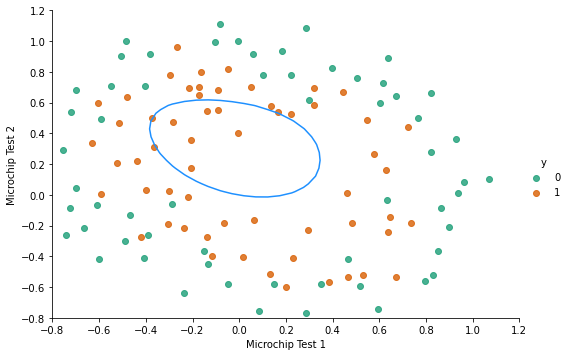

In [84]:
plot_decision_boundary(model.coef_.T, X, y)